<a href="https://colab.research.google.com/github/othoni-hub/ECG1/blob/main/Ch6_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CPGE-ECG1** 
<img src="https://drive.google.com/uc?id=12Wo3LubGGT4qOvYFAuLP4CyCuwjKNVuk" width="230" height="150" align = "right"/>

## **Ch6 - Notebook : Statistiques**




**O.Thöni - Lycée Saint-Charles Sainte Croix - LE MANS**

# **Découverte de la bibliothèque pandas**

<img src="https://mymltalks.com/wp-content/uploads/2021/01/pandas.jpg" width="280" height="150" align = "right"/>

Pandas est une bibliothèque conçue pour les traitements statistiques.

Elle vient avec deux nouveau types de données construits :
* la **"série"**, uni-dimensionnelle, c'est-à-dire, à une seule variable
* le **"DataFrame"**, multi-dimensionnel : pour les mêmes modalités, on observe plusieurs variables.

Ces nouveaux objets sont accompagnés de leur lot de fonctions et de méthodes, en voici quelques une, à l'occasion du traitement des exemples du cours.

# **Étude d'une série qualitative nominale**
## **Exemple 1 du cours : état civil d'une population de 20 personnes**

**à retenir :**
* **Constitution des colonnes du tableau statistique :**
    * **Effectifs**
    * **Fréquences**
* **Fabrication du DataFrame *Pandas* récapitulant ces variables en colonnes, indexé par les modalités**
* **représentations graphiques :**
    * **Diagramme en barres**
    * **Camembert**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
X = ["M", "M", "D", "C", "C", "M", "C", "C", "C", "M", "C", "M", "V", "M", "V", "D", "C", "C", "C", "M"]
n = len(X)

Omega = set([ x for x in X])
Liste_Omega = list(Omega)

Effectifs = [X.count(k) for k in Omega] # liste des effectifs de chaque modalité

data = dict({}) # création d'un dictionnaire clés : modalités, valeurs : effectifs
for i in range(len(Omega)) :
    data[Liste_Omega[i]] = Effectifs[i]
data # data est un dictionnaire dont les clés sont les valeurs de X et les valeurs leur effectif dans X

# autre commande possible :
# data = dict(zip(Omega,Effectifs))

{'C': 9, 'D': 2, 'M': 7, 'V': 2}

In [3]:
df = pd.DataFrame([data]) # transformation du dictionnaire en DataFrame pandas
df

,D,M,V,C
0,2,7,2,9


In [4]:
serie = pd.Series(Effectifs, index = Omega) # format plus adapté à notre exemple
serie

D    2
M    7
V    2
C    9
dtype: int64

## **tableau statistique**

In [5]:
df2 = pd.DataFrame(serie)
df2

,0
D,2
M,7
V,2
C,9


In [6]:
df2.columns = ['Eff']
df2

,Eff
D,2
M,7
V,2
C,9


* **Complément du tableau statistique avec les fréquences**

In [7]:
Frequences = [e / n for e in Effectifs]
df2.insert(1,"Freq" , Frequences)
df2

,Eff,Freq
D,2,0.10
M,7,0.35
V,2,0.10
C,9,0.45


**Écriture directe du DataFrame**


In [8]:
X = ["M", "M", "D", "C", "C", "M", "C", "C", "C", "M", "C", "M", "V", "M", "V", "D", "C", "C", "C", "M"]
n = len(X)

Omega = set([ x for x in X])
Liste_Omega = list(Omega)

Effectifs = np.array([X.count(k) for k in Omega]) # liste des effectifs de chaque modalité,transformée en tableau numpy, pour pouvoir calculer dessus
Frequences = Effectifs / n

df = pd.DataFrame({ "Eff" : Effectifs, "Freq" : Frequences}, index = Omega)
df

,Eff,Freq
D,2,0.10
M,7,0.35
V,2,0.10
C,9,0.45


## **diagrammes**

### **diagramme en barres**

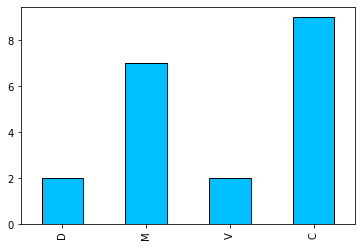

In [9]:
diagramme_en_barres = df2['Eff'].plot.bar(color = "deepskyblue", edgecolor = "black")

### **diagramme en camembert**

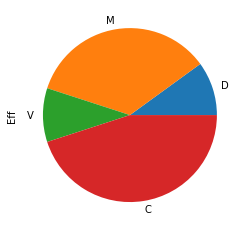

In [10]:
camembert = df2['Eff'].plot.pie()

# **Étude d'une série qualitative ordinale**

## **Exemple 2 du cours : "niveau de diplôme dans une population de 50 personnes".**

**à retenir :**
* **Constitution des colonnes du tableau statistique :**
    * **Effectifs**
    * **Fréquences**
    * **Effectifs cumulés**
    * **Fréquences cumulées**
* **Fabrication du DataFrame *Pandas* récapitulant ces variables en colonnes, indexé par les modalités**

## **Tableau statistique**

In [11]:
X = ["Sd","Sd","Sd","Sd","P","P","P","P","P","P","P","P","P","P","P","Se","Se","Se","Se","Se","Se","Se","Se","Se","Se","Se","Se","Se","Se",
"Su","Su","Su","Su","Su","Su","Su","Su","Su","U","U","U","U","U","U","U","U","U","U","U","U"]

In [12]:
n = len(X)

Omega = [ "Sd","P","Se","Su","U"] # en raison des "prédecesseurs", le caractère ordonné d'une liste est préférable au dictionnaire

Effectifs = np.array([X.count(k) for k in Omega]) # liste des effectifs de chaque modalité,transformée en tableau numpy, pour pouvoir calculer dessus
Frequences = Effectifs / n
Effectifs_cumules = np.cumsum(Effectifs)
Frequences_cumulees = np.cumsum(Frequences)



In [13]:
Effectifs_cumules

array([ 4, 15, 29, 38, 50])

In [14]:
Frequences_cumulees

array([0.08, 0.3 , 0.58, 0.76, 1.  ])

In [15]:
df = pd.DataFrame({ "Eff" : Effectifs, "Freq" : Frequences, "EffCum" : Effectifs_cumules, "FreqCum" : Frequences_cumulees} , index = Omega)
df

,Eff,Freq,EffCum,FreqCum
Sd,4,0.08,4,0.08
P,11,0.22,15,0.30
Se,14,0.28,29,0.58
Su,9,0.18,38,0.76
U,12,0.24,50,1.00


## **Diagrammes**

### **diagramme semi-circulaire**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  This is separate from the ipykernel package so we can avoid doing imports until


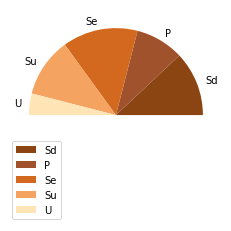

In [16]:
x = pd.DataFrame(reversed(Effectifs / 100))# 50 valeurs, comptées comme 100 pour faire un demi-camembert...ruse

demicamembert = plt.pie(x, labels = Omega, colors = ["saddlebrown", "sienna", "chocolate", "sandybrown", "moccasin"])
plt.legend()

### **Diagramme en barres**

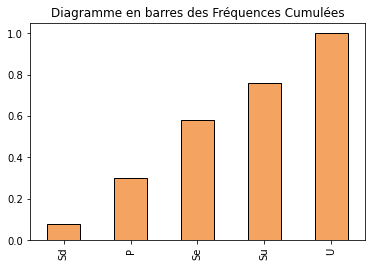

In [17]:
diagramme_en_barres = df['FreqCum'].plot.bar(color = "sandybrown", edgecolor = "black" )
Diag_freqCum = plt.title('Diagramme en barres des Fréquences Cumulées')

# **Étude d'une série quantitative discrète**

## **Nombre de personnes par foyer**

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [19]:
X = [1,1,1,1,1,2,2,2,2,2,2,2,2,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,4,4,4,4,4,4,4,4,4,4,5,5,5,5,5,5,6,6,6,8,8]

n = len(X)
Omega = set(x for x in X)

# calcul des effectifs pour chaque modalité
Effectifs = np.array([len([x for x in X if x == i]) for i in Omega])
# calcul des fréquences pour chaque modalité
Frequences = Effectifs / n

# Calcul des effectifs cumulés pour chaque modalité (nombre de foyers comptant moins (au sens large) de ... personnes)
Effectifs_cumules = np.cumsum(Effectifs)
# Calcul des fréquences cumulées
Frequences_cumulees = np.cumsum(Frequences)

In [20]:
Omega

{1, 2, 3, 4, 5, 6, 8}

In [21]:
Effectifs

array([ 5,  9, 15, 10,  6,  3,  2])

In [22]:
n

50

In [23]:
Frequences

array([0.1 , 0.18, 0.3 , 0.2 , 0.12, 0.06, 0.04])

In [24]:
Effectifs_cumules

array([ 5, 14, 29, 39, 45, 48, 50])

In [25]:
Frequences_cumulees

array([0.1 , 0.28, 0.58, 0.78, 0.9 , 0.96, 1.  ])

## **Tableau statistique**

In [26]:
df = pd.DataFrame({ "Eff" : Effectifs, "Freq" : Frequences, "EffCum" : Effectifs_cumules, "FreqCum" : Frequences_cumulees} , index = Omega)
df

,Eff,Freq,EffCum,FreqCum
1,5,0.10,5,0.10
2,9,0.18,14,0.28
3,15,0.30,29,0.58
4,10,0.20,39,0.78
5,6,0.12,45,0.90
6,3,0.06,48,0.96
8,2,0.04,50,1.00


## **Diagrammes en bâtons**

Dans le cadre d'une série statistique quantitative discrète, le diagramme adapté pour les effectifs et fréquences, cumulé(e)s ou non, est le **diagramme en bâtons**

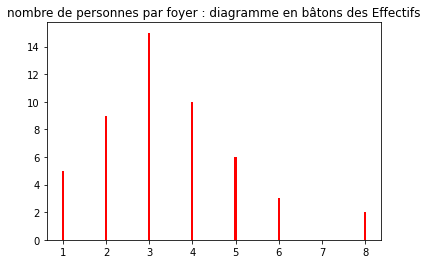

In [27]:

plt.bar(list(Omega),Effectifs, width = 0.05, color = 'red')
plt.title('nombre de personnes par foyer : diagramme en bâtons des Effectifs')
plt.show()

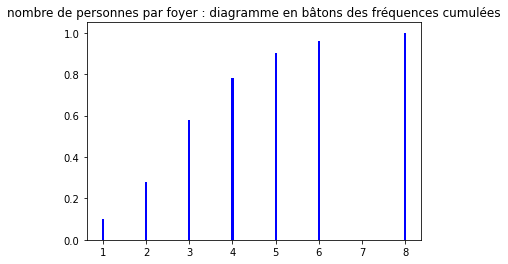

In [28]:
plt.bar(list(Omega),Frequences_cumulees, width = 0.05, color = 'blue')
plt.title('nombre de personnes par foyer : diagramme en bâtons des fréquences cumulées')
plt.show()

## **Fonction de répartition**

In [29]:
def reaxe() :
    ax = plt.gca()
    ax.spines['left'].set_position('zero')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('zero')
    ax.spines['top'].set_color('none')


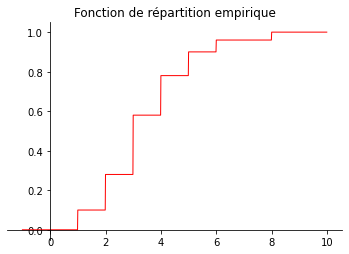

In [30]:
xx = np.arange(min(Omega) -  2 , max(Omega)+2, 0.01)
FF = []
liste_Omega = list(Omega)
J = len(Omega)

# Tracé vrai d'une fonction numérique
for x in xx :
    rang = 0
    if x < liste_Omega[0] :
        FF.append(0)
    elif x < liste_Omega[J-1] :
        while rang < len(Omega)  and liste_Omega[rang] < x : # on cherche le plus grand j tel que x_j < x, alors, F(x) = F_j
            rang = rang + 1
        FF.append(Frequences_cumulees[rang-1])
    else :
        FF.append(1)

plt.plot(xx,FF,'r',linewidth=1)
plt.title("Fonction de répartition empirique")
reaxe()

plt.show()

... ou mieux, pour faire disparaître les segments verticaux

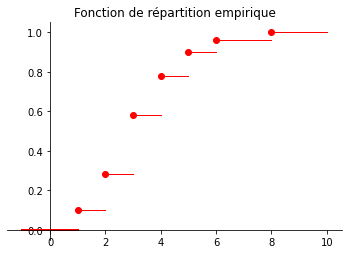

In [31]:
liste_Omega = list(Omega)
J = len(Omega)

# On trace la fonction de répartition discrète segment par segment
xx = [liste_Omega[0] - 2, liste_Omega[0]]
FF = [0,0]
plt.plot(xx,FF,'r',linewidth=2)

for i in range(J-1) :
    xx = [liste_Omega[i], liste_Omega[i+1]]
    FF = [Frequences_cumulees[i],Frequences_cumulees[i]]
    plt.plot(xx,FF,'r',linewidth=1)
    plt.plot(liste_Omega[i],Frequences_cumulees[i],'or')

xx = [liste_Omega[J-1], liste_Omega[J-1] + 2]
FF = [1,1]
plt.plot(xx,FF,'r',linewidth=1)
plt.plot(liste_Omega[J-1],Frequences_cumulees[J-1],'or')

reaxe()
plt.title("Fonction de répartition empirique")
plt.show()

## **Éléments caractéristiques**

In [32]:
Omega

{1, 2, 3, 4, 5, 6, 8}

In [33]:
liste_Omega

[1, 2, 3, 4, 5, 6, 8]

In [34]:
Effectifs

array([ 5,  9, 15, 10,  6,  3,  2])

### **Mode**

In [35]:
mode = liste_Omega[0]
rang_mode = 0
for i in range(len(Omega)) :
    if Effectifs[i] > Effectifs[mode] :
        mode = liste_Omega[i]
        rang_mode = i

print('La valeur modale est : ', mode, ', avec un effectif de ', Effectifs[rang_mode])


La valeur modale est :  3 , avec un effectif de  15


### **Moyenne**

* à partir des données tabulées (utilisation de la formule du cours) :

In [36]:
X_bar = 1/n * sum([liste_Omega[i]*Effectifs[i] for i in range(len(Omega))])

print('Il y a en moyenne ', X_bar , ' personnes par foyer.')

Il y a en moyenne  3.44  personnes par foyer.


* à partir des données brutes... c'est plus direct...

**commande *mean( )* de NumPy (à connaître)**

In [37]:
X_bar = np.mean(X)
X_bar

3.44

### **Variance**

* à partir des données tabulées (utilisation de la formule du cours) :

In [38]:
Variance_X = 1/n * sum([((liste_Omega[i] - X_bar))**2*Effectifs[i] for i in range(len(Omega))])

print('Variance : ', Variance_X )

Variance :  2.6064


* à partir des données brutes

In [39]:
Variance_X = np.var(X)
Variance_X

2.6064

### **Écart-type**

In [40]:
ecart_type_X = np.sqrt(Variance_X)
ecart_type_X

1.614434885648845

...ou encore...

In [41]:
ecart_type_X = np.std(X)
ecart_type_X

1.614434885648845

### **Quartiles**

In [42]:
[q1,q3] = np.quantile(X,[0.25,0.75])
print('1er quartile : ', q1, ' , 3ème quartile : ',q3)

1er quartile :  2.0  , 3ème quartile :  4.0


### **1<sup>er</sup> et 9<sup>ème</sup> déciles**

In [43]:
[d1,d9] = np.quantile(X,[0.10,0.90])
print('1er décile : ', d1, ' , 9ème décile : ',d9)

1er décile :  1.9000000000000004  , 9ème décile :  5.100000000000001


### **Boîte à moustaches (*box-plot*)**

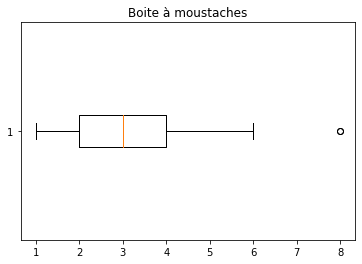

In [44]:
BoiteAMoustaches = plt.boxplot(X, vert = False)
plt.title('Boite à moustaches')
plt.show()

# **Étude d'une série statistique continue**
## **Taille en cm de 50 élèves d'un niveau de classe d'un lycée**

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [46]:
# série statistique
X = [152, 152, 152, 153, 153, 154, 154, 154, 155, 155, 
     156, 156, 156, 156, 156, 157, 157, 157, 158, 158, 
     159, 159, 160, 160, 160, 161, 160, 160, 161, 162,
     162, 162, 163, 164, 164, 164, 164, 165, 166, 167,
     168, 168, 168, 169, 169, 170, 171, 171, 171, 171 ]

n = len(X) # nombre d'individus

In [47]:
# classes
bins = [151.5 , 155.5 , 159.5 , 163.5 , 167.5 , 171.5 ] # bins = "boites"


In [48]:
# calcul des effectifs dans chaque classe
effectifs = np.array([len([x for x in X if bins[i] <= x < bins[i+1]]) for i in range(len(bins)-1)]) 
    # compte combien de valeurs figurent dans chaque classe
effectifs[-1] = effectifs[-1] + len([x for x in X if x == bins[-1]]) 
    # pour le cas où des valeurs seraient égales à la borne sup de la dernière classe
    
# largeurs et centres de classes, étendue
amplitudes = [bins[i+1] - bins[i] for i in range(len(bins)-1)]
centres_de_classes = [(bins[i+1] + bins[i])/2 for i in range(len(bins)-1)]
etendue = bins[-1] - bins[0]

# fréquences et densités de fréquence (nécessaires pour un histogramme vrai)
frequences = effectifs / n
densites_de_frequences = frequences / amplitudes 
    # indispensables pour tracer un histogramme vrai quand les classes sont d'amplitudes inégales


# effectifs et fréquences et densités de fréquence cumulées
effectifs_cumules = np.cumsum(effectifs)
frequences_cumulees = np.cumsum(frequences)
densites_de_frequences_cumulees = densites_de_frequences / amplitudes

In [49]:
Index = ["[ 151.5 ; 155.5 [", "[ 155.5 ; 159.5[", "[ 159.5 ; 163,5 [", "[ 163,5 ; 167,5 [", "[ 167,5 ; 171,5 [" ]
df = pd.DataFrame({ "Eff" : effectifs, "Freq" : frequences, "DensFreq" : densites_de_frequences, "EffCum" : effectifs_cumules, "FreqCum" : frequences_cumulees, "DensFreqCum" :densites_de_frequences_cumulees} , index = Index )
df

,Eff,Freq,DensFreq,EffCum,FreqCum,DensFreqCum
[ 151.5 ; 155.5 [,10,0.20,0.050,10,0.20,0.01250
[ 155.5 ; 159.5[,12,0.24,0.060,22,0.44,0.01500
"[ 159.5 ; 163,5 [",11,0.22,0.055,33,0.66,0.01375
"[ 163,5 ; 167,5 [",7,0.14,0.035,40,0.80,0.00875
"[ 167,5 ; 171,5 [",10,0.20,0.050,50,1.00,0.01250


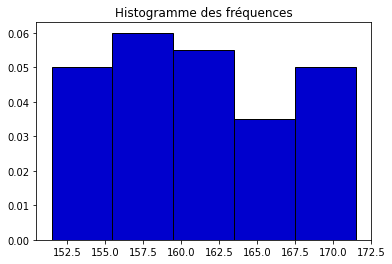

In [50]:
plt.bar(centres_de_classes,densites_de_frequences,width = amplitudes, color ="mediumblue", edgecolor = 'black')
plt.title('Histogramme des fréquences')
plt.show()

## **Calcul manuel de la médiane**

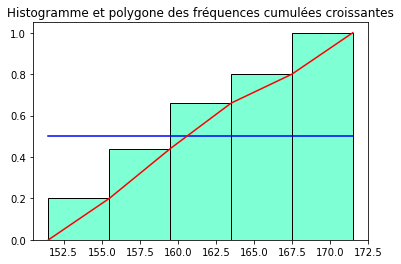

In [51]:
plt.bar(centres_de_classes,frequences_cumulees,width = amplitudes, color ="aquamarine", edgecolor = 'black')
plt.title('Histogramme et polygone des fréquences cumulées croissantes')
plt.plot([bins[0],bins[-1]],[0.5,0.5], color = "blue")
plt.plot([bins[0],bins[1]], [0,frequences_cumulees[0]], color = "red")
plt.plot(bins[1:], frequences_cumulees, color = "red")
plt.show()

## **Point de vigilance sur les histogrammes**

**Histogramme : importance de la proportionnalité des fréquences à la surface des rectangles et non à leur hauteur**

Rappel : dans Python "hist" tabule les données, et crée un vulgaire diagramme en barres :

Text(0.5, 1.0, 'Histogramme faux (diagramme en barres larges)')

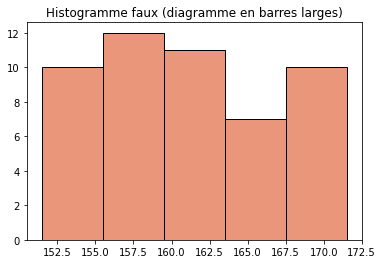

In [52]:
histo = plt.hist(X,bins, color = "darksalmon", edgecolor = "black") 
    # plt.hist renvoie 2 arrays, les effectifs et les bins, 
    # et trace... un bête diagramme en barre, pas un histogramme
plt.title('Histogramme faux (diagramme en barres larges)')

Jusque-là, le diagramme est identique, puisque les "bins" sont de largeurs égales...
Modifions les "bins" n°2 et 3 :


Text(0.5, 1.0, 'Histogramme faux (diagramme en barres larges)')

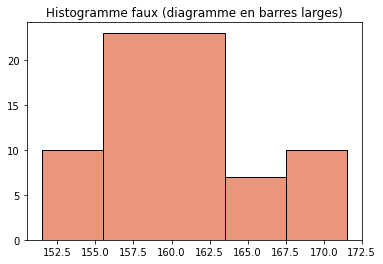

In [53]:
bins = [151.5 , 155.5 , 163.5 , 167.5 , 171.5 ] # bins = "boites"
histo = plt.hist(X,bins, color = "darksalmon", edgecolor = "black") 
plt.title('Histogramme faux (diagramme en barres larges)')

Et là, c'est une catastrophe, la hauteur du rectangle est proportionnelle à l'effectif, on a une très mauvaise idée de la répartition des valeurs de la série.

Reprenons nos deux graphiques, en faisant figurer cette fois les densités de fréquences. Remarquez qu'on n'utilise pas la commande *hist*, mais *bar*, bien paramétrée... (en donnant à chaque barre la largeur de sa classe, et pour hauteur la densité de probabilité.)

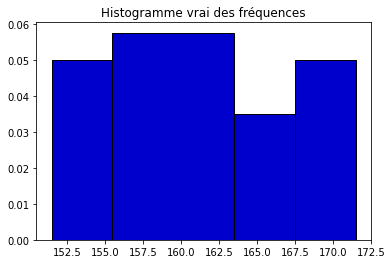

In [54]:
# calcul des effectifs dans chaque classe
effectifs = np.array([len([x for x in X if bins[i] <= x < bins[i+1]]) for i in range(len(bins)-1)]) 
    # compte combien de valeurs figurent dans chaque classe
effectifs[-1] = effectifs[-1] + len([x for x in X if x == bins[-1]]) 
    # pour le cas où des valeurs seraient égales à la borne sup de la dernière classe
    
# largeurs et centres de classes
amplitudes = [bins[i+1] - bins[i] for i in range(len(bins)-1)]
centres_de_classes = [(bins[i+1] + bins[i])/2 for i in range(len(bins)-1)]

# fréquences et densités de fréquence (nécessaires pour un histogramme vrai)
frequences = effectifs / n
densites_de_frequences = frequences / amplitudes 
    # indispensables pour tracer un histogramme vrai quand les classes sont d'amplitudes inégales


# effectifs et fréquences et densités de fréquence cumulées
effectifs_cumules = np.cumsum(effectifs)
frequences_cumulees = np.cumsum(frequences)
densites_de_frequences_cumulees = np.cumsum(densites_de_frequences)

plt.bar(centres_de_classes,densites_de_frequences,width = amplitudes, color ="mediumblue", edgecolor = 'black')
plt.title('Histogramme vrai des fréquences')
plt.show()

Le diagramme obtenu est bien plus proche de la réalité de la répartition des données : c'est cette fois la **surface** des rectangles qui est proportionnelle à la fréquence ou à l'effectif

Un autre procédé est d'ajouter un paramètre à la commande *hist* : *"density = True"*

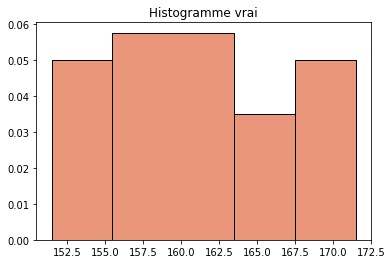

In [55]:
histo = plt.hist(X,bins, color = "darksalmon", edgecolor = "black", density = True) 
plt.title('Histogramme vrai')
plt.show()

**La commande *hist* s'utilise sur les données brutes, ne pas oublier "*density = True*", l'autre procédé sur les données déjà tabulées, en utilisant les densités de fréquence.**